# Project 3: Association Rule Mining, Clustering, or Collaborative Filtering I


<br>

<br>

## Part 1: Business Understanding

Each year, there are roughly 6 million traffic accidents in the United States, resulting in more than 46,000 deaths. With varying success, a multitude of efforts and iniatives have been implemented to try to mitigate the risk to American families on the roads.

Recently, a new data set has been compiled from traffic data captured by a series of sources, including law enforcement agencies, departments of transportation, traffic cameras, and traffic sensors. 

Our team has been tasked with the analysis of this new data set, which includes US accident details from 2016 through 2021. Our goal is to identify similarities and relationships between these events, with an end goal of pinpointing specific risk factors that can be mitigated to make the roadways a safer environment.

Once we identify a series of key relationships between accident-causing factors, we will compare them using three evaulation metrics:

-   **Support**

    -   Support is a measure of the frequency of an item set within all sets in the data. It will help our team to gain an understanding of the most common relating factors in traffic accidents.

<br>

-   **Confidence**

    -   Confidence gives us a measure of how likely one attribute exists given that another is present. For example, we would expect a fairly high confidence that we would finding a pairing of snowy weather, given we already have a pairing of low temperature and precipitation. 

<br>

-   **Lift**

    -   Lift helps us to understand how *interesting* a given association rule is. It illustrates how likely item **A** is, given that item **B** is present, while controlling for how often item **A** occurs in the data set. For example, we would expect to see an attribute like low visibility present if it is raining, but there is a likelihood that a variety of other factors also play into low visibility, which would reduce the lift of rain on low visibility.

By identifying a series of assocation rules around US traffic accidents and evaluating them using support, confidence, and lift, we plan to present a series of key risk factor pairings associated with road incidents. With these factors, we may be able to point to specific risks that can be addressed and mitigated to help make US roadways a safer environment.

# Part 2: Data Understanding

In [1]:
import pandas as pd

acc_data = pd.read_csv('/Users/epotter/Desktop/accident_data.csv')

acc_data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


|#|Attribute|Description|Nullable|
| --- | --- | --- | --- |
|1|ID|This is a unique identifier of the accident record.|No|
|2|Severity|Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).|No|
|3|Start_Time|Shows start time of the accident in local time zone.|No|
|4|End_Time|Shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow was dismissed.|No|
|5|Start_Lat|Shows latitude in GPS coordinate of the start point.|No|
|6|Start_Lng|Shows longitude in GPS coordinate of the start point.|No|
|7|End_Lat|Shows latitude in GPS coordinate of the end point.|Yes|
|8|End_Lng|Shows longitude in GPS coordinate of the end point.|Yes|
|9|Distance(mi)|The length of the road extent affected by the accident.|No|
|10|Description|Shows natural language description of the accident.|No|
|11|Number|Shows the street number in address field.|Yes|
|12|Street|Shows the street name in address field.|Yes|
|13|Side|Shows the relative side of the street (Right/Left) in address field.|Yes|
|14|City|Shows the city in address field.|Yes|
|15|County|Shows the county in address field.|Yes|
|16|State|Shows the state in address field.|Yes|
|17|Zipcode|Shows the zipcode in address field.|Yes|
|18|Country|Shows the country in address field.|Yes|
|19|Timezone|Shows timezone based on the location of the accident (eastern, central, etc.).|Yes|
|20|Airport_Code|Denotes an airport-based weather station which is the closest one to location of the accident.|Yes|
|21|Weather_Timestamp|Shows the time-stamp of weather observation record (in local time).|Yes|
|22|Temperature(F)|Shows the temperature (in Fahrenheit).|Yes|
|23|Wind_Chill(F)|Shows the wind chill (in Fahrenheit).|Yes|
|24|Humidity(%)|Shows the humidity (in percentage).|Yes|
|25|Pressure(in)|Shows the air pressure (in inches).|Yes|
|26|Visibility(mi)|Shows visibility (in miles).|Yes|
|27|Wind_Direction|Shows wind direction.|Yes|
|28|Wind_Speed(mph)|Shows wind speed (in miles per hour).|Yes|
|29|Precipitation(in)|Shows precipitation amount in inches, if there is any.|Yes|
|30|Weather_Condition|Shows the weather condition (rain, snow, thunderstorm, fog, etc.)|Yes|
|31|Amenity|A POI annotation which indicates presence of amenity in a nearby location.|No|
|32|Bump|A POI annotation which indicates presence of speed bump or hump in a nearby location.|No|
|33|Crossing|A POI annotation which indicates presence of crossing in a nearby location.|No|
|34|Give_Way|A POI annotation which indicates presence of give_way in a nearby location.|No|
|35|Junction|A POI annotation which indicates presence of junction in a nearby location.|No|
|36|No_Exit|A POI annotation which indicates presence of no_exit in a nearby location.|No|
|37|Railway|A POI annotation which indicates presence of railway in a nearby location.|No|
|38|Roundabout|A POI annotation which indicates presence of roundabout in a nearby location.|No|
|39|Station|A POI annotation which indicates presence of station in a nearby location.|No|
|40|Stop|A POI annotation which indicates presence of stop in a nearby location.|No|
|41|Traffic_Calming|A POI annotation which indicates presence of traffic_calming in a nearby location.|No|
|42|Traffic_Signal|A POI annotation which indicates presence of traffic_signal in a nearby loction.|No|
|43|Turning_Loop|A POI annotation which indicates presence of turning_loop in a nearby location.|No|
|44|Sunrise_Sunset|Shows the period of day (i.e. day or night) based on sunrise/sunset.|Yes|
|45|Civil_Twilight|Shows the period of day (i.e. day or night) based on civil twilight.|Yes|
|46|Nautical_Twilight|Shows the period of day (i.e. day or night) based on nautical twilight.|Yes|
|47|Astronomical_Twilight|Shows the period of day (i.e. day or night) based on astronomical twilight.|Yes|

#### Data Source and Description:

-   Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, arXiv preprint arXiv:1906.05409 (2019).

-   Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. “Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights.” In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.

### Data: Initial Findings

-   With a goal of identifying relationships between attributes, it is clear that we'll need to manipulate some of the data for our needs
-   For example, we'll need to adjust come of the continuous attributes, such as temperature, to categorical variable representing temperature ranges. 
-   Some variables are likely redundant, such as zip code and county.

**Note:** These issues will be addressed in the following section.

## Data Cleaning

In [2]:
print(acc_data.head())

# All attributes that will be unique for each entity in the data set need to be addressed, since these will never result in pairings.
# We will either remove these attributes entirely, or encode them.

# To start, we will limit our attribute list by instituting a rule: we need there to be a likelihood that there are at least 100 repetitions of the same value within the data set. 

# Since we are dealing with over 2.8 million distinct accidents, we need a consistent level of repepition of value in order to establish rules.
# For any attribute with under 2845342 / 100 = 28454 unique values, we will either remove the attribute or transform it to a more useable form.

uniques = pd.DataFrame(acc_data.nunique())[pd.DataFrame(acc_data.nunique())>len(acc_data)/100]
print(uniques)
print(uniques[uniques[0].notnull()==True])

# We can remove ID, Number, Street, Description, and ZipCode.
# We already have locational data, and long/lat data points are highly specific, so we will remove these attributes as well


drops = ["ID", "Number", "Street", "Zipcode", 
         "Description", "Start_Lat", "Start_Lng",
         "End_Lat", "End_Lng"]

for x in drops:
    acc_data = acc_data.drop(x, axis = 1)

# Now we need to address Start/End Times, Start/End Longitude and Latitude, and Weather Timestamps

# Start/End Time: We will drop end time, since it relates to local response to the accident, and change start time to an hour:minute breakdown 
# in the day as well as a date and month attribute for the accident

# We will remove "weather timestamp," since the time in which a local agency posted weather information has no likely bearing on the actual conditions on the road or the time of the accident itself

new_time = pd.DataFrame(pd.to_datetime(acc_data.Start_Time))['Start_Time'].astype(str)

starts = new_time.str[10:].str[:-3]
hour = new_time.str[10:].str[:-6]
minute = new_time.str[10:].str[:-3].str[4:]
month = new_time.str[:-12].str[5:]
year = new_time.str[:-15]
date = new_time.str[:-9]

acc_data["TimeStamp"] = starts
acc_data["Hour"] = hour
acc_data["Minute"] = minute
acc_data["Month"] = month
acc_data["Year"] = year
acc_data["Date"] = date


drops = ["Start_Time","End_Time","Weather_Timestamp"]
for x in drops:
    acc_data = acc_data.drop(x, axis = 1)


# We now have a much more useable data set for determining relationships - next, we will focus on investigating abnormal and/or null values

print(pd.DataFrame(acc_data.nunique()))

    ID  Severity           Start_Time             End_Time  Start_Lat  \
0  A-1         3  2016-02-08 00:37:08  2016-02-08 06:37:08  40.108910   
1  A-2         2  2016-02-08 05:56:20  2016-02-08 11:56:20  39.865420   
2  A-3         2  2016-02-08 06:15:39  2016-02-08 12:15:39  39.102660   
3  A-4         2  2016-02-08 06:51:45  2016-02-08 12:51:45  41.062130   
4  A-5         3  2016-02-08 07:53:43  2016-02-08 13:53:43  39.172393   

   Start_Lng    End_Lat    End_Lng  Distance(mi)  \
0 -83.092860  40.112060 -83.031870         3.230   
1 -84.062800  39.865010 -84.048730         0.747   
2 -84.524680  39.102090 -84.523960         0.055   
3 -81.537840  41.062170 -81.535470         0.123   
4 -84.492792  39.170476 -84.501798         0.500   

                                         Description  ...  Roundabout Station  \
0  Between Sawmill Rd/Exit 20 and OH-315/Olentang...  ...       False   False   
1                 At OH-4/OH-235/Exit 41 - Accident.  ...       False   False   
2    

## Attribute Investigation

[Text(0.5, 1.0, 'Severity Distribution')]

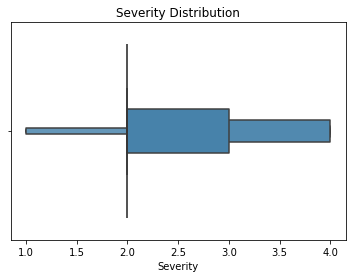

In [3]:
import seaborn as sns

# Null Values?

acc_data[acc_data["Severity"].isna()==True]

# Findings: None present in the data set

sns.boxenplot(x = acc_data["Severity"]).set(title='Severity Distribution')

# Findings: 
#   Fairly normally distributed - somewhat left skewed
#   Majority of entiries are between 2 and 4


[Text(0.5, 1.0, 'Road Distance Distribution')]

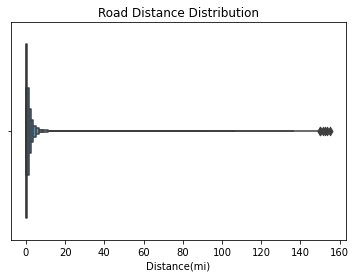

In [4]:
# Null Values?

acc_data[acc_data["Distance(mi)"].isna()==True]

# Findings: None present in the data set

sns.boxenplot(x = acc_data["Distance(mi)"]).set(title='Road Distance Distribution')

# Findings: 
#   Data are heavity right skewed by long roads
#   We expect some roads to be long, so we will leave these values alone

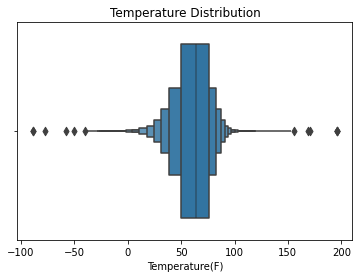

In [5]:
# Null Values?

acc_data[acc_data["Temperature(F)"].isna()==True]

# Findings: None present in the data set
#   There are null values present in the data set - these were likely just not pulled during investigation
#   We will investigate later if these need to be removed



sns.boxenplot(x = acc_data["Temperature(F)"]).set(title='Temperature Distribution')

# Findings: There are some unrealistic temperature values in this set. We will remove anything less than -30 F or over 130 F
acc_data = acc_data[acc_data["Temperature(F)"]>-30]
acc_data = acc_data[acc_data["Temperature(F)"]<130]

[Text(0.5, 1.0, 'Wind Chill Distribution')]

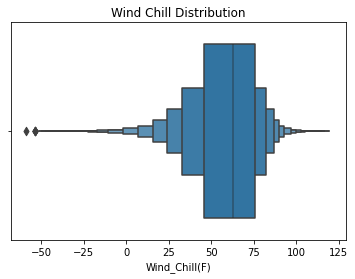

In [6]:
# Null Values?

acc_data[acc_data["Wind_Chill(F)"].isna()==True]

# Findings: None present in the data set
#   There are null values present in the data set - these are likely related to no wind chill during that day
#   We will investigate whether or not to remove these later in the section


sns.boxenplot(x = acc_data["Wind_Chill(F)"]).set(title='Wind Chill Distribution')

# Findings
#   There are some low values, but this can be expected with wind chill. We will keep these

[Text(0.5, 1.0, 'Humidity Distribution')]

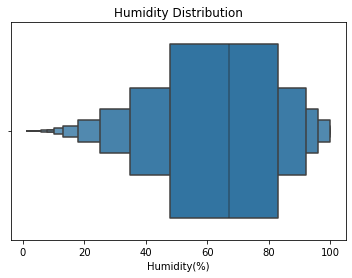

In [7]:
# Null Values?

acc_data[acc_data["Humidity(%)"].isna()==True]

# Findings
#   Null values are present, though only a few thousand
#   These were likely just not pulled during the crash investigation.
#   We will review these later in the section


sns.boxenplot(x = acc_data["Humidity(%)"]).set(title='Humidity Distribution')

# Findings
#   Fairly normally distributed, though somewhat left skewed

[Text(0.5, 1.0, 'Pressure Distribution')]

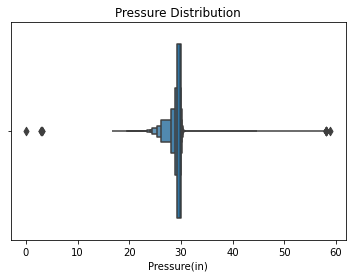

In [8]:
# Null Values?

acc_data[acc_data["Pressure(in)"].isna()==True]

# Findings
#   Null values are present, though only a few thousand
#   These were likely just not pulled during the crash investigation.
#   We will review these later in the section

# Distribution

sns.boxenplot(x = acc_data["Pressure(in)"]).set(title='Pressure Distribution')

# Findings
#   We see outliers in both the high and low end of the spectrum, but that makes sense given that this data set includes outlier weather events
#   Outside of this, the distribution appears left skewed

,Severity,Distance(mi),Side,City,County,State,Country,Timezone,Airport_Code,Temperature(F),...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,TimeStamp,Hour,Minute,Month,Year,Date
11859,3,1.843,R,Denver,Adams,CO,US,US/Mountain,KBJC,21.2,...,Night,Night,Day,Day,06:23,06,23,12,2016,2016-12-01
13903,2,0.488,R,Denver,Denver,CO,US,US/Mountain,KBJC,46.4,...,Day,Day,Day,Day,07:28,07,28,12,2016,2016-12-20
15491,4,0.588,R,Denver,Denver,CO,US,US/Mountain,KBJC,19.4,...,Day,Day,Day,Day,09:20,09,20,01,2017,2017-01-07
16631,2,0.459,R,Denver,Adams,CO,US,US/Mountain,KBJC,37.4,...,Night,Night,Day,Day,06:40,06,40,01,2017,2017-01-19
21549,2,0.193,R,Denver,Denver,CO,US,US/Mountain,KBJC,46.4,...,Day,Day,Day,Day,07:03,07,03,09,2016,2016-09-16


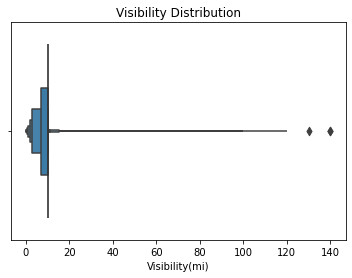

In [9]:
# Null Values?

acc_data[acc_data["Visibility(mi)"].isna()==True]

# Findings
#   Null values are present - likely just not pulled during crash investigation
#   We will review these later in the section


# Distribution

sns.boxenplot(x = acc_data["Visibility(mi)"]).set(title='Visibility Distribution')

# Findings
#   Heavily right skewed by a few extremely clear days
#   From an initial investigation below, it appears that these are related to areas of higher elevation, which makes sense. 
#   We will keep these values and move forward with caution

acc_data[acc_data["Visibility(mi)"]>50].head()

[Text(0.5, 1.0, 'Wind Speed Distribution After Outliers Removed')]

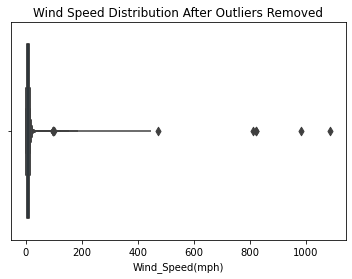

In [10]:
# Null Values?

acc_data[acc_data["Wind_Speed(mph)"].isna()==True]

# Findings
#   Around 100K null values are present - likely just not pulled during crash investigation
#   We will review these later in the section, since we may be able to adjust these to 0 or normalize them


# Distribution

sns.boxenplot(x = acc_data["Wind_Speed(mph)"]).set(title='Wind Speed Distribution')

# Findings
#   Some of these wind speeds are extremely unrealistic for on land. We will remove anything over 100 mph so we can still account for weather events


acc_data = acc_data[acc_data["Wind_Speed(mph)"]<100]

sns.boxenplot(x = acc_data["Wind_Speed(mph)"]).set(title='Wind Speed Distribution After Outliers Removed')

#   After accounting for outliers, the distribution looks fairly normal with some right skewness due to a few higher wind days

[Text(0.5, 1.0, 'Precipitation Distribution After Outliers Removed')]

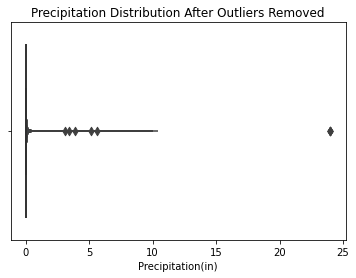

In [11]:
# Null Values?

acc_data[acc_data["Precipitation(in)"].isna()==True]

# Findings
#   Around 400K null values are present - likely just not pulled during crash investigation
#   We will review these later in the section, since we may be able to adjust these to 0 or normalize them


# Distribution

sns.boxenplot(x = acc_data["Precipitation(in)"]).set(title='Precipitation Distribution')

# Findings
#   This is heavily skewed to the right by around 100 rows. We will remove these

acc_data = acc_data[acc_data["Precipitation(in)"]<8]

sns.boxenplot(x = acc_data["Precipitation(in)"]).set(title='Precipitation Distribution After Outliers Removed')

#   Distribution is still right skewed by heavy rain days, but looks much better


### Binary Value Attributes

In [12]:
# Turning Loop only has false values, which is not helpful. We will remove this column

acc_data.Turning_Loop.value_counts()
acc_data = acc_data.drop("Turning_Loop", axis = 1)

binaries = ['Amenity', 'Bump', 'Crossing', 'Give_Way','Junction', 
'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
'Traffic_Calming', 'Traffic_Signal']


bin_list = []
for x in binaries:
    f = pd.DataFrame(acc_data[x].value_counts()).iloc[0][0]
    t = pd.DataFrame(acc_data[x].value_counts()).iloc[1][0]
    bin_list.append([x,round((t/(t+f))*100,8), round((f/(t+f))*100,48)])

tf_vals = pd.DataFrame(bin_list)
tf_vals.set_axis(['Attribute', '% True', '% False'], axis=1, inplace=True)

print(tf_vals)

# Findings
#   The majority of values are false, which makes sense
#   We will pay attention to these attributes to see how the rare occurrence of them
#   impacts association rules




          Attribute    % True    % False
0           Amenity  1.054765  98.945235
1              Bump  0.040675  99.959325
2          Crossing  7.666177  92.333823
3          Give_Way  0.241130  99.758870
4          Junction  8.488089  91.511911
5           No_Exit  0.162081  99.837919
6           Railway  0.807129  99.192871
7        Roundabout  0.004515  99.995485
8           Station  2.660968  97.339032
9              Stop  1.932401  98.067599
10  Traffic_Calming  0.065948  99.934052
11   Traffic_Signal  9.600702  90.399298


### Remaining Attributes

In [13]:
# Null Value Investigation

remaining = ['Side', 'City', 'County', 'State','Country', 'Timezone', 
             'Airport_Code', 'Wind_Direction', 'Weather_Condition',
             'Sunrise_Sunset','Civil_Twilight', 'Nautical_Twilight', 
             'Astronomical_Twilight', 'TimeStamp', 'Hour', 'Minute', 'Month', 'Year', 'Date']

for x in remaining:
    print(x)
    print(acc_data[x].isna().value_counts())

# Findings:
#   We see some null values for city, wind direction, weather condition, and attributes relating to time of day.
#   We will investigate these, as well as the other null values, at the end of this section

Side
False    2259366
Name: Side, dtype: int64
City
False    2259254
True         112
Name: City, dtype: int64
County
False    2259366
Name: County, dtype: int64
State
False    2259366
Name: State, dtype: int64
Country
False    2259366
Name: Country, dtype: int64
Timezone
False    2259366
Name: Timezone, dtype: int64
Airport_Code
False    2259366
Name: Airport_Code, dtype: int64
Wind_Direction
False    2259352
True          14
Name: Wind_Direction, dtype: int64
Weather_Condition
False    2252778
True        6588
Name: Weather_Condition, dtype: int64
Sunrise_Sunset
False    2257184
True        2182
Name: Sunrise_Sunset, dtype: int64
Civil_Twilight
False    2257184
True        2182
Name: Civil_Twilight, dtype: int64
Nautical_Twilight
False    2257184
True        2182
Name: Nautical_Twilight, dtype: int64
Astronomical_Twilight
False    2257184
True        2182
Name: Astronomical_Twilight, dtype: int64
TimeStamp
False    2259366
Name: TimeStamp, dtype: int64
Hour
False    2259366
Name: Hou

[Text(0.5, 1.0, 'Distribution of Side of Road')]

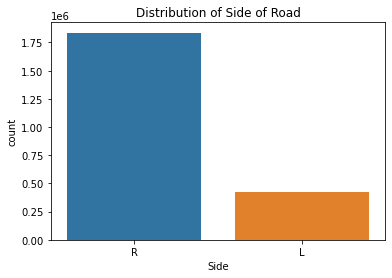

In [14]:
import matplotlib.pyplot as plt


sns.countplot(x = acc_data['Side']).set(title = "Distribution of Side of Road")

# Findings
#   The majority of accidents happen on the right side of the road, which makes sense for US driving incidents


              City  counts
335        Atlanta   10502
364         Austin   15714
414    Bakersfield   11539
499    Baton Rouge   17238
1546     Charlotte   24902
2168        Dallas   33885
4242       Houston   29046
4444  Jacksonville   12512
5264   Los Angeles   57053
5820         Miami   99195
5925   Minneapolis   19768
6250     Nashville   18335
6381   New Orleans   15323
6838       Orlando   50278
7181       Phoenix   13115
7415      Portland   16901
7552       Raleigh   21135
7727      Richmond   12490
7792     Riverside   11391
8019    Sacramento   17950
8079    Saint Paul   14321
8135     San Diego   22400
9335        Tucson   12434


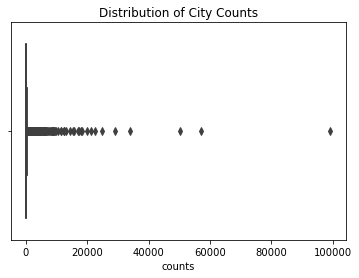

In [15]:
cities = acc_data.groupby(['City']).size().reset_index(name='counts')
sns.boxplot(x = cities.counts).set(title = "Distribution of City Counts")

# Findings
#   It is clear that only a few cities have the majority of accidents, which makes sense based on popluations

sns.boxplot(x = cities.counts[cities.counts < 1000]).set(title = "Distribution of City Counts")

# Even for the lower accident counts, we the data skewed to the right, which is expected

print(cities[cities.counts > 10000])

# As expected, the top accident cities are also the most populated


              County  counts
11           Alameda   28325
382           Dallas   39386
390         Davidson   23801
620           Harris   30307
634         Hennepin   23146
740             Kern   20042
832      Los Angeles  165520
869         Maricopa   23263
911      Mecklenburg   26273
928       Miami-Dade  134408
959       Montgomery   37018
1049          Orange  100208
1203       Riverside   35832
1232      Sacramento   23788
1249  San Bernardino   45212
1250       San Diego   39277
1483            Wake   29140


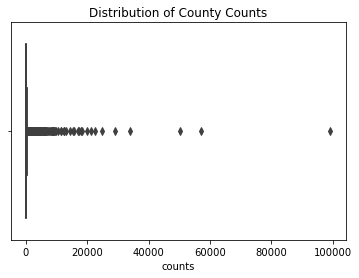

In [16]:
counties = acc_data.groupby(['County']).size().reset_index(name='counts')
sns.boxplot(x = cities.counts).set(title = "Distribution of City Counts")

# Findings
#   Similar to cities, we see a few counties a very high number of incidents

sns.boxplot(x = counties.counts[counties.counts < 1000]).set(title = "Distribution of County Counts")

# Even for the lower accident counts, we the data skewed to the right, which is expected

print(counties[counties.counts > 20000])

# As expected, the top accident counties are also the most populated


[Text(0.5, 1.0, 'State Distribution')]

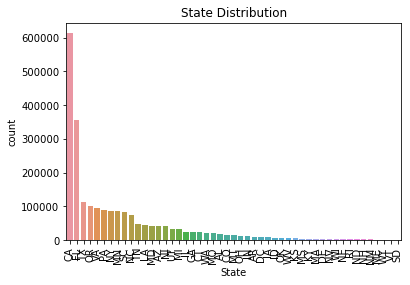

In [17]:
plt.xticks(rotation = 'vertical')

sns.countplot(x = acc_data['State'], order = acc_data['State'].value_counts().index).set(title = "State Distribution")

# Findings:
#   We can see that the most populous states have the highest number of incidents, which is to be expected




[Text(0.5, 1.0, 'Timezone Distribution')]

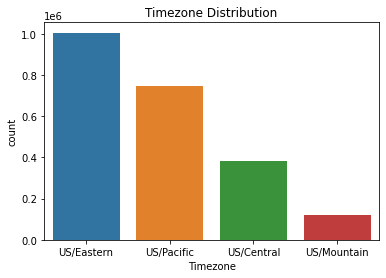

In [18]:
sns.countplot(x = acc_data['Timezone']).set(title = "Timezone Distribution")

# Findings
#   The majority of accidents are on the coasts, which tend to have the highest populations

[Text(0.5, 1.0, 'Distribution of Airpot_Code Counts')]

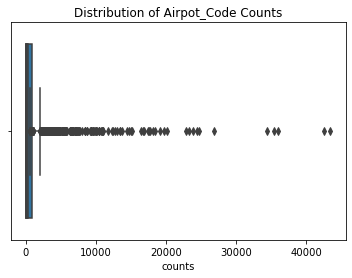

In [19]:
#sns.countplot(x = acc_data['Airpot_Code']).set(title = "Airport Code Distribution")


codes = acc_data.groupby(['Airport_Code']).size().reset_index(name='counts')
sns.boxplot(x = codes.counts).set(title = "Distribution of Airport Code Counts")

# Findings
#   We see a few airpots a very high number of incidents, which is likely related to higher populations near specific airports

sns.boxplot(x = codes.counts[codes.counts < 1000]).set(title = "Distribution of Airpot_Code Counts")

# Even for the lower accident counts, we the data skewed to the right, which is expected


/var/folders/5z/rrr_71gx4dn_b_ccqzrlwrw80000gq/T/ipykernel_18298/526706202.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acc_data.Wind_Direction[acc_data.Wind_Direction == 'South'] = 'S'
/var/folders/5z/rrr_71gx4dn_b_ccqzrlwrw80000gq/T/ipykernel_18298/526706202.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acc_data.Wind_Direction[acc_data.Wind_Direction == 'North'] = 'N'
/var/folders/5z/rrr_71gx4dn_b_ccqzrlwrw80000gq/T/ipykernel_18298/526706202.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

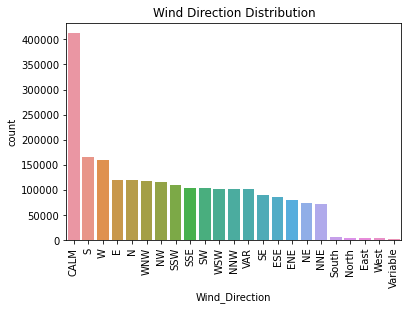

In [20]:
plt.xticks(rotation = 'vertical')

sns.countplot(x = acc_data['Wind_Direction'], order = acc_data['Wind_Direction'].value_counts().index).set(title = "Wind Direction Distribution")

# Findings
#   It is clear that the majority of accidents happen on calm days, which is likely related to a higher number of calm wind days
#   Also, we can see that some values are mislabled, so we will fix this below

acc_data.Wind_Direction[acc_data.Wind_Direction == 'South'] = 'S'
acc_data.Wind_Direction[acc_data.Wind_Direction == 'North'] = 'N'
acc_data.Wind_Direction[acc_data.Wind_Direction == 'West'] = 'W'
acc_data.Wind_Direction[acc_data.Wind_Direction == 'East'] = 'E'

,counts
count,2.900000e+01
mean,7.722728e+04
std,2.054863e+05
min,1.052000e+03
25%,3.840000e+03
50%,6.375000e+03
75%,2.928900e+04
max,1.048350e+06


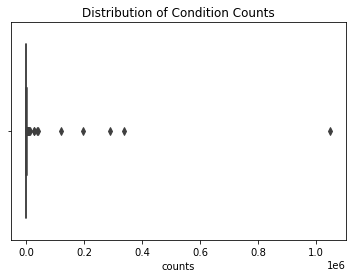

In [21]:
conditions = acc_data.groupby(['Weather_Condition']).size().reset_index(name='counts')
conditions = conditions.sort_values(by = "counts")


sns.boxplot(x = conditions.counts).set(title = "Distribution of Condition Counts")

conditions[conditions.counts < 1000].describe()
conditions[conditions.counts >= 1000].describe()

# Findings
#   It is evident that a low number of conditions account for the majority of all accidents!
#   We will note this and move forward with caution - these may need to be consolidated, but it likely will have limited impact


[Text(0.5, 1.0, 'Sunrise/Sunset Distribution')]

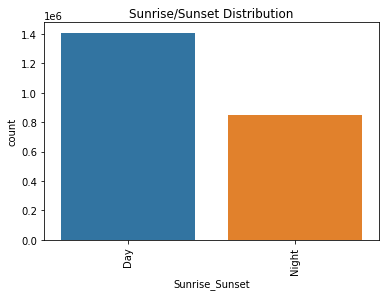

In [22]:
plt.xticks(rotation = 'vertical')

sns.countplot(x = acc_data['Sunrise_Sunset'], order = acc_data['Sunrise_Sunset'].value_counts().index).set(title = "Sunrise/Sunset Distribution")

# Findings
#   A higher count of accidents happen during the day, which seems a little surprising
#   This is likely due to a higher number of drivers on the road

[Text(0.5, 1.0, 'Sunrise/Sunset Distribution')]

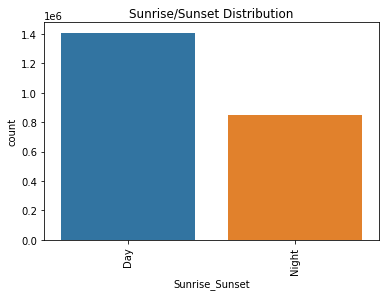

In [23]:
plt.xticks(rotation = 'vertical')

sns.countplot(x = acc_data['Sunrise_Sunset'], order = acc_data['Sunrise_Sunset'].value_counts().index).set(title = "Sunrise/Sunset Distribution")

[Text(0.5, 1.0, 'Civil Twilight Distribution')]

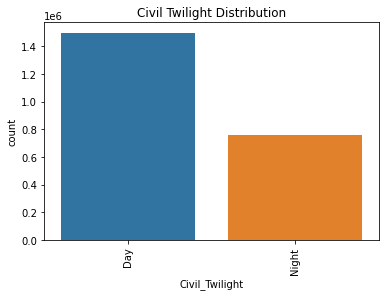

In [24]:
plt.xticks(rotation = 'vertical')

sns.countplot(x = acc_data['Civil_Twilight'], order = acc_data['Civil_Twilight'].value_counts().index).set(title = "Civil Twilight Distribution")

# Findings
#   As with the previous Day/Night comparison, a higher number of accidents happen during the day
#   This is likely due to a higher count of drivers on the road
#   Note: The multiple day/night attributes are likely redundant - we will choose an idea one later in the section

[Text(0.5, 1.0, 'Nautical Twilight Distribution')]

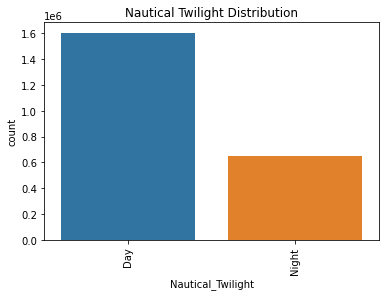

In [25]:
plt.xticks(rotation = 'vertical')

sns.countplot(x = acc_data['Nautical_Twilight'], order = acc_data['Nautical_Twilight'].value_counts().index).set(title = "Nautical Twilight Distribution")

# Findings
#   As with the previous Day/Night comparison, a higher number of accidents happen during the day
#   This is likely due to a higher count of drivers on the road
#   Note: The multiple day/night attributes are likely redundant - we will choose an idea one later in the section

[Text(0.5, 1.0, 'Astronomical Twilight Distribution')]

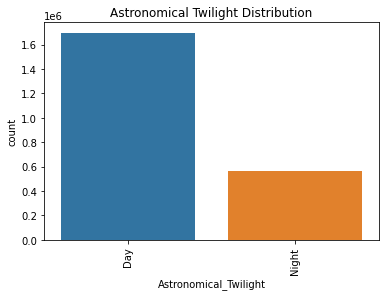

In [26]:
plt.xticks(rotation = 'vertical')

sns.countplot(x = acc_data['Astronomical_Twilight'], order = acc_data['Astronomical_Twilight'].value_counts().index).set(title = "Astronomical Twilight Distribution")

# Findings
#   As with the previous Day/Night comparison, a higher number of accidents happen during the day
#   This is likely due to a higher count of drivers on the road
#   Note: The multiple day/night attributes are likely redundant - we will choose an idea one later in the section

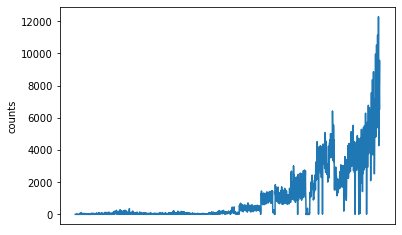

In [27]:
date_counts = acc_data.groupby(['Date']).size().reset_index(name='counts')
sns.lineplot(x = date_counts.Date, y = date_counts.counts).xaxis.set_visible(False) 

# Findings
#   We see a clear positive trend in car accidents as date increases

[Text(0.5, 1.0, 'Hour Distribution')]

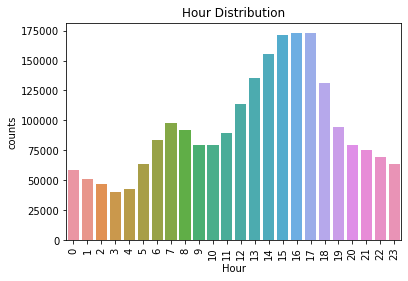

In [28]:
plt.xticks(rotation = 'vertical')

hours = acc_data.groupby(['Hour']).size().reset_index(name='counts')
hours.Hour = hours.Hour.astype(int)

sns.barplot(x = hours['Hour'], y = hours['counts'], order = hours['Hour']).set(title = "Hour Distribution")


# Findings
#   As with the previous day/night comparisons, we see a higher number of accidents later in the day
#   Generally, we see an increase in accidents from 12 am to 3 pm with a peak between 3-5, which aligns with rush hours

[Text(0.5, 1.0, 'Minute Distribution')]

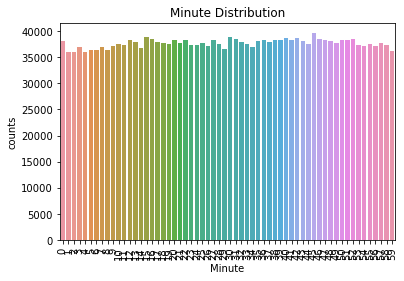

In [29]:
plt.xticks(rotation = 'vertical')

mins = acc_data.groupby(['Minute']).size().reset_index(name='counts')
mins.Minute = mins.Minute.astype(int)

sns.barplot(x = mins['Minute'], y = mins['counts'], order = mins['Minute']).set(title = "Minute Distribution")


# Findings
#   We don't see a clear trend on part of hour vs number of accidents
#   This may indicate the whether it is the top, middle, or end of a given hour has little impact on accident rate

### Null Values

In [30]:
# Check to see which attributes have null values

null_vals = []

for x in acc_data.columns.values:
    null_vals.append([x, acc_data[x].isna().sum()])

null_df = pd.DataFrame(null_vals)

null_df.set_axis(['Attribute', 'Null Values'], axis = 1, inplace = True)
null_df

# Next we will see the impact of simply removing these rows

full_row_count = len(acc_data)

acc_nn = acc_data

nulls = null_df[null_df['Null Values']>0]

for x in nulls.Attribute:
    drops =  acc_nn[acc_nn[x].isna()]
    acc_nn = acc_nn.drop(drops.index, axis = 0)

no_null_count = len(acc_nn)

full_row_count - no_null_count

print('Original Count: ' + str(full_row_count))
print('Non Null Row Count: ' + str(no_null_count))
print('Rows Lost: ' + str(full_row_count-no_null_count))
print('% Data Lost: ' + str(((full_row_count-no_null_count)/full_row_count)*100))

# We only lost around 2% of the data when we removed all the null values! 
# We'll move forward with this new non-null data set

acc_data = acc_nn
# Last check for null values:

null_vals = []

for x in acc_data.columns.values:
    null_vals.append([x, acc_data[x].isna().sum()])

null_df = pd.DataFrame(null_vals)

null_df

# All nulls removed!

# Select Day/Night Attribute

# We will move forward with Sunrise/Sunset since these are the most interpretable 

acc_data = acc_data.drop("Civil_Twilight", axis = 1)
acc_data = acc_data.drop("Nautical_Twilight", axis = 1)
acc_data = acc_data.drop("Astronomical_Twilight", axis = 1)

Original Count: 2259366
Non Null Row Count: 2207265
Rows Lost: 52101
% Data Lost: 2.3060008869744877


## Cleaned Data: Definitions

|Attribute|Description|Type|
| --- | --- | --- |
| Severity | Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay). | Ordinal |
| Distance(mi) | The length of the road extent affected by the accident. | Interval |
| Side | Shows the relative side of the street (Right/Left) in address field. | Nominal |
| City | Shows the city in address field. | Nominal |
| County | Shows the county in address field. | Nominal |
| State | Shows the state in address field. | Nominal |
| Country | Shows the country in address field. | Nominal |
| Timezone | Shows timezone based on the location of the accident (eastern, central, etc.). | Nominal |
| Airport_Code | Denotes an airport-based weather station which is the closest one to location of the accident. | Nominal |
| Temperature(F) | Shows the temperature (in Fahrenheit). | Interval |
| Wind_Chill(F) | Shows the wind chill (in Fahrenheit). | Interval |
| Humidity(%) | Shows the humidity (in percentage). | Ratio |
| Pressure(in) | Shows the air pressure (in inches). | Ratio |
| Visibility(mi) | Shows visibility (in miles). | Ratio |
| Wind_Direction | Shows wind direction. | Nominal |
| Wind_Speed(mph) | Shows wind speed (in miles per hour). | Ratio |
| Precipitation(in) | Shows precipitation amount in inches, if there is any. | Ratio |
| Weather_Condition | Shows the weather condition (rain, snow, thunderstorm, fog, etc.) | Nominal |
| Amenity | A POI annotation which indicates presence of amenity in a nearby location. | Ordinal |
| Bump | A POI annotation which indicates presence of speed bump or hump in a nearby location. | Ordinal |
| Crossing | A POI annotation which indicates presence of crossing in a nearby location. | Ordinal |
| Give_Way | A POI annotation which indicates presence of give_way in a nearby location. | Ordinal |
| Junction | A POI annotation which indicates presence of junction in a nearby location. | Ordinal |
| No_Exit | A POI annotation which indicates presence of no_exit in a nearby location. | Ordinal |
| Railway | A POI annotation which indicates presence of railway in a nearby location. | Ordinal |
| Roundabout | A POI annotation which indicates presence of roundabout in a nearby location. | Ordinal |
| Station | A POI annotation which indicates presence of station in a nearby location. | Ordinal |
| Stop | A POI annotation which indicates presence of stop in a nearby location. | Ordinal |
| Traffic_Calming | A POI annotation which indicates presence of traffic_calming in a nearby location. | Ordinal |
| Traffic_Signal | A POI annotation which indicates presence of traffic_signal in a nearby loction. | Ordinal |
| Sunrise_Sunset | Shows the period of day (i.e. day or night) based on sunrise/sunset. | Ordinal |
| TimeStamp | Timestamp of the traffic incident | Interval |
| Hour | Hour of the traffic incident | Interval |
| Minute | Minute of the traffic incident | Interval |
| Month | Month of the traffic incident | Interval |
| Year | Year of the traffic incident | Interval |
| Date | Date of the traffic incident | Interval |

### Relationships Among Attributes

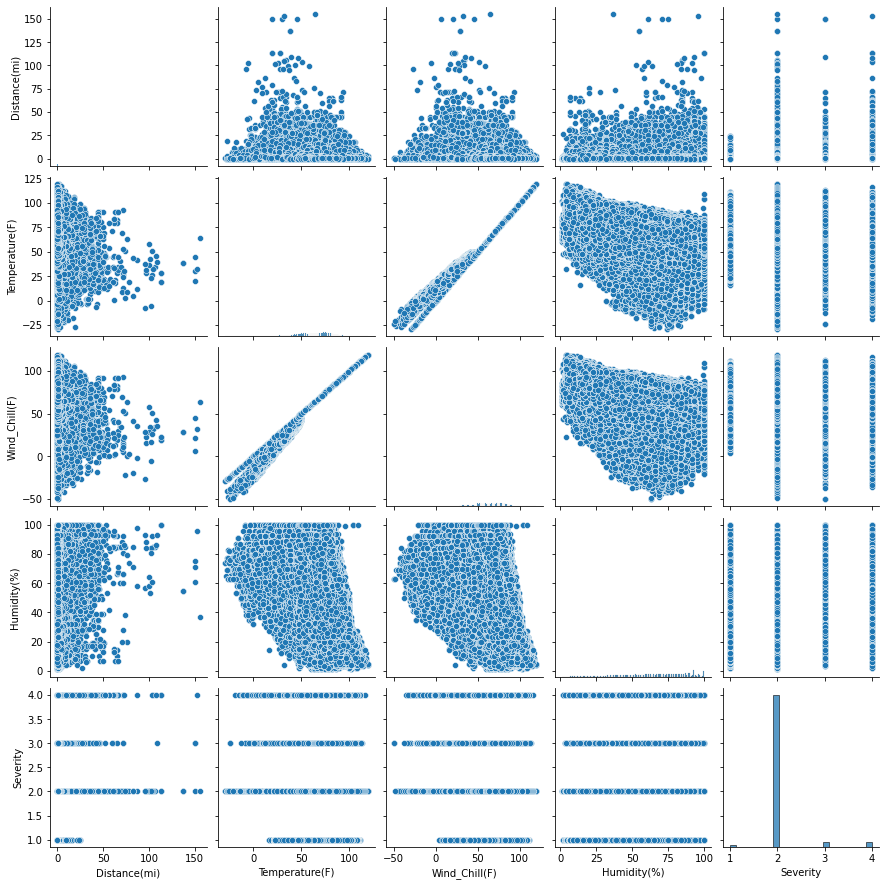

In [31]:
numerical_a = acc_data[['Distance(mi)','Temperature(F)','Wind_Chill(F)','Humidity(%)', 'Severity']]

sns.pairplot(numerical_a)

#### Key Relationships:
-   Temperature vs Wind Chill
    -   There is a clear positive correlation between temperature and wind chill
-   Temperature vs Humidity
    -   There appears to be a moderate negative correlation between temperature and humidity
-   Wind Chill vs Humidity
    -   Similar to Temperature and Humidity, there appears to be a negative correlation between wind chill and humidity

**Note:** The clear relationships here exist between variables associated with weather. This is to be expected, because they have a natural relationship and are impacted by eachother. If we were creating a regression model, we would need to account for these, but instead we will note this and move forward with caution


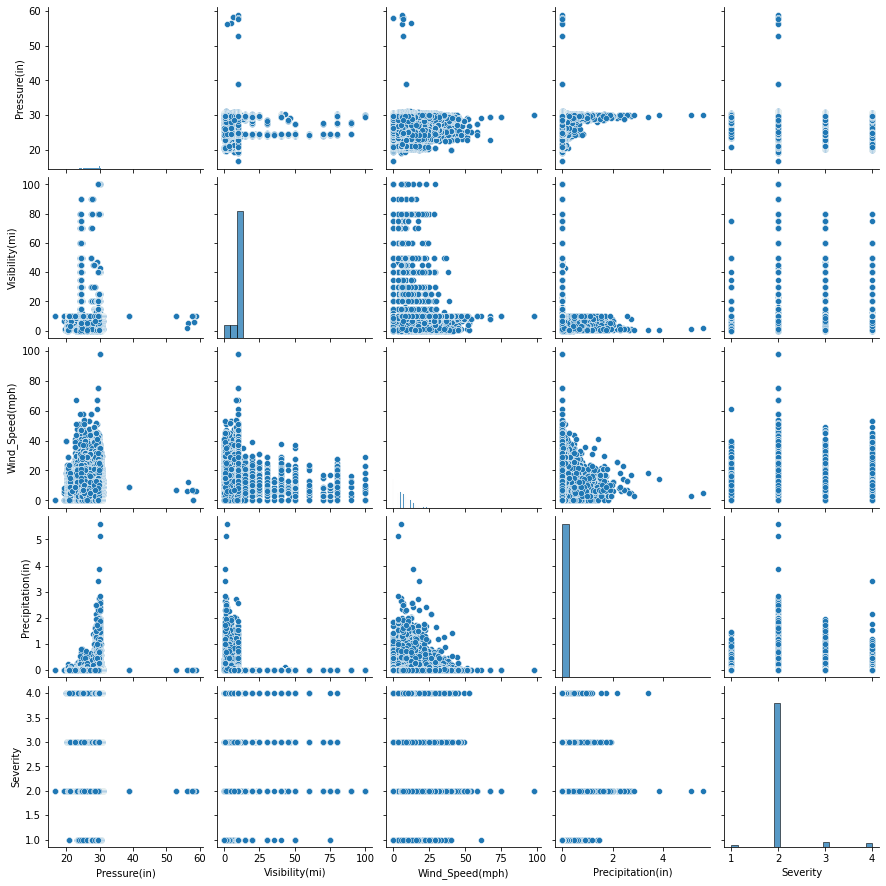

In [32]:
numerical_b = acc_data[['Pressure(in)','Visibility(mi)','Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Severity']]

sns.pairplot(numerical_b)

#### Key Relationships:
-   Pressure vs Visibility
    -   There appears to be a negative correlation between pressure and visibility
-   Visibility vs Wind Speed
    -   We can see a fairly strong negative correlation between visibility and wind speed
-   Visibility vs Precipitation
    -   There is a stark negative correlation between visibility and precipitation, which is intuitive since an increase in rain or snow will decrease visibility
-   Wind Speed vs Precipitation
    -   There existis a negative correlation between wind speed and precipitation, which is a little surprising since we would expect storm patterns to include both higher winds and precipitation.


**Note:** Again, these relationship are all associated with weather. This is expected, and we will note these relationships and move forward with caution when constructing our association rules.

[Text(0.5, 1.0, 'States with Top Severity Scores')]

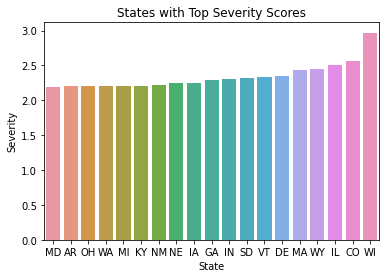

In [55]:
state_severity = acc_data.groupby(['State']).mean().reset_index()[['State','Severity']].sort_values(by = 'Severity')
df = state_severity[state_severity['Severity'] >= state_severity['Severity'].mean()]

sns.barplot(x = df['State'], y = df['Severity']).set(title = "States with Top Severity Scores")

**Findings:**
-   It is interesting to note that the states with the highest average severity scores do not match the states with the highest number of accidents
-   It is likely that the state with larger populations have significantly higher accident counts, which results in more "normalized" overall severity scores

[Text(0.5, 1.0, 'Average Severity by Month')]

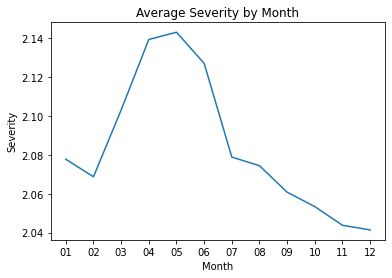

In [70]:
month_severity = acc_data.groupby(['Month']).mean().reset_index()[['Month','Severity']].sort_values(by = 'Month')

sns.lineplot(x = month_severity['Month'], y = month_severity['Severity']).set(title = "Average Severity by Month")


**Findings:**
-   The average severity score increases during the spring to early summer and then decreased through the fall and winder
-   That is a little counter intuitive, since we'd expect colder months to have more dangerous driving conditions
-   It is possible that this is due to more people being on the road during the warmer months

[Text(0.5, 1.0, 'Average Severity by Hour')]

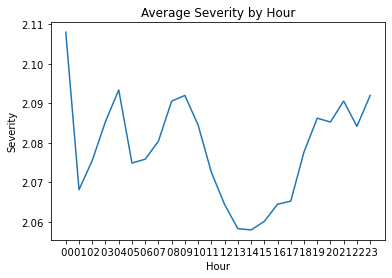

In [71]:
hour_severity = acc_data.groupby(['Hour']).mean().reset_index()[['Hour','Severity']].sort_values(by = 'Hour')

sns.lineplot(x = hour_severity['Hour'], y = hour_severity['Severity']).set(title = "Average Severity by Hour")

**Findings:**
-   The average severity score peaks around midnight, spikes twice in the early and mid morning, and then jumps in the afternoon through evening
-   The midnight spike may be related to an increase in erradic driving behavior in the late evening / early morning hours
-   The other spikes seem to relate to both morning and evening commute times
-   There is a noticeable drop in average severity at around noon, which may be related to normal working hours

# Part 3: Modeling and Evaluation (50 points total)

-   Different tasks will require different evaluation methods. Be as thorough as possible when analyzing 
the data you have chosen and use visualizations of the results to explain the performance and 
expected outcomes whenever possible. Guide the reader through your analysis with plenty of 
discussion of the results. 

**Option B: Association Rule Mining**
-   Create frequent itemsets and association rules. 
-   Use tables/visualization to discuss the found results. 
-   Use several measure for evaluating how interesting different rules are. 
-   Describe your results. What findings are the most compelling and why? 

# Part 4: Deployment (10 points total) 
-   Be critical of your performance and tell the reader how you current model might be usable by 
other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling? 
-   How useful is your model for interested parties (i.e., the companies or organizations 
that might want to use it)? 
-   How would your deploy your model for interested parties?  
-   What other data should be collected?  
-   How often would the model need to be updated, etc.? 
  
# Part 5: Exceptional Work (10 points total) 
-   You have free reign to provide additional analyses or combine analyses 